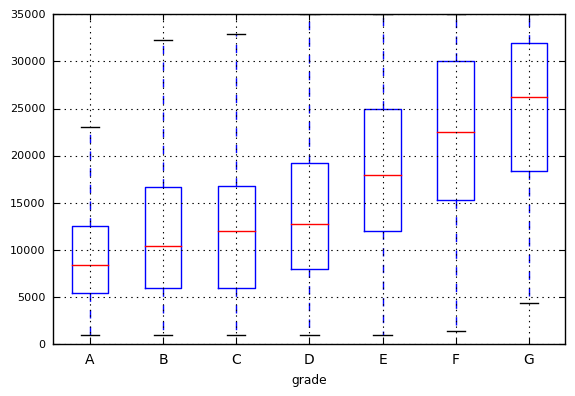

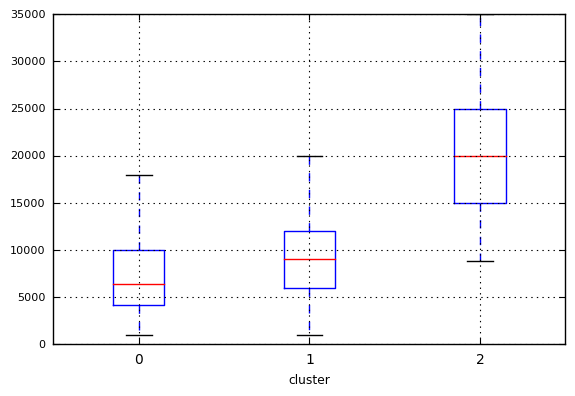

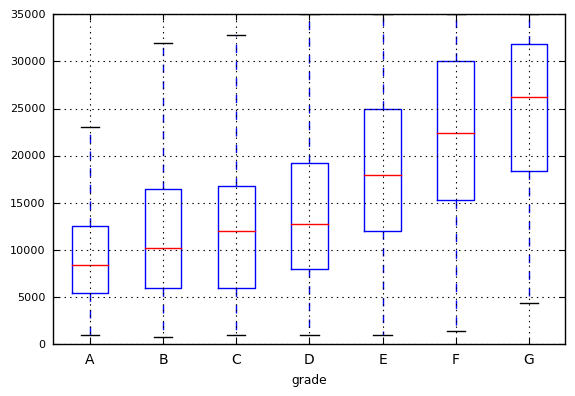

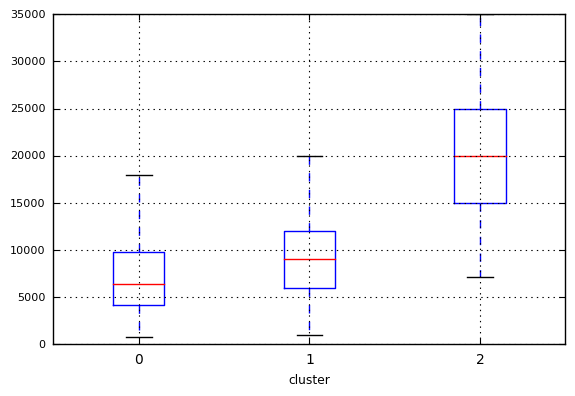

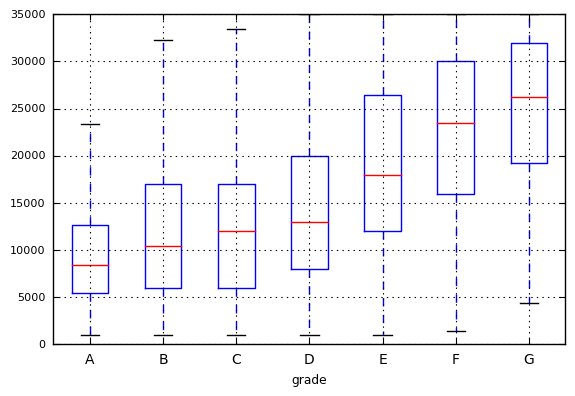

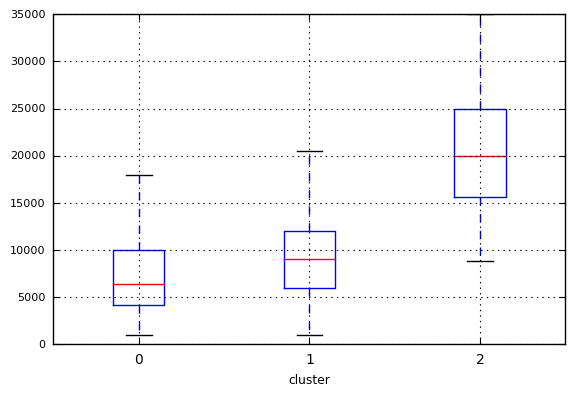

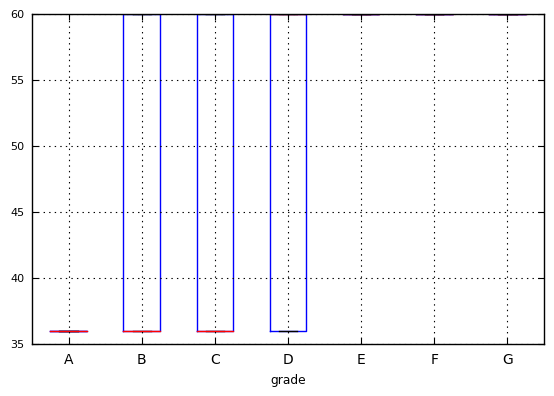

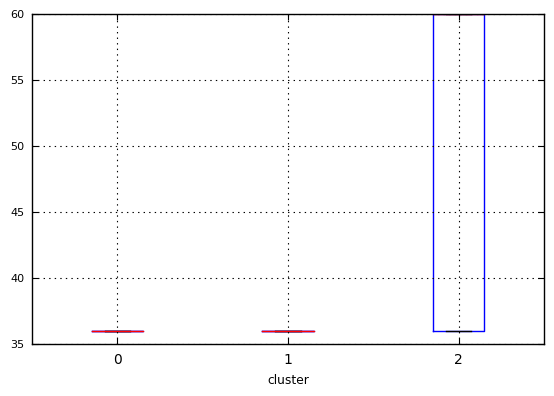

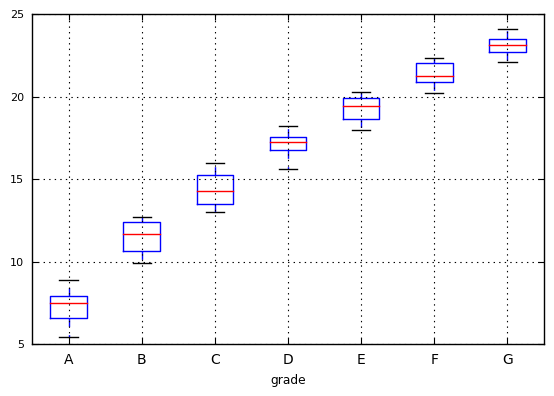

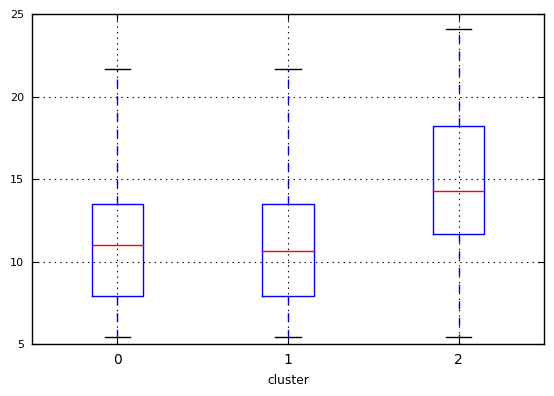

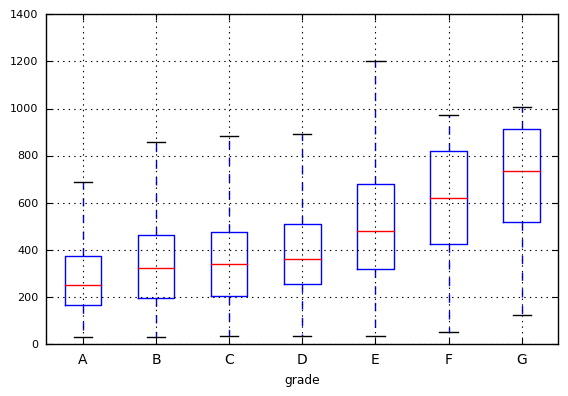

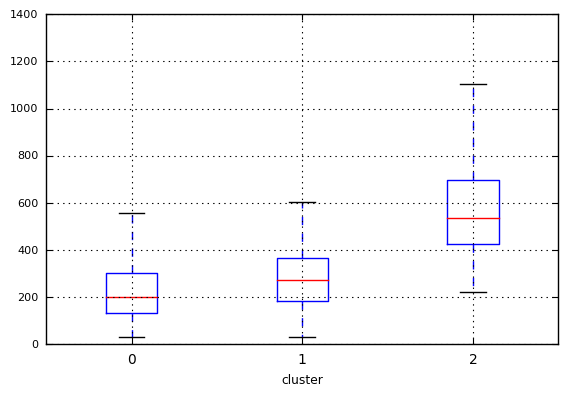

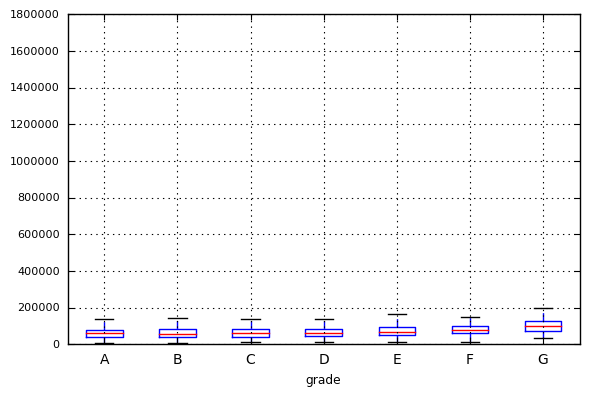

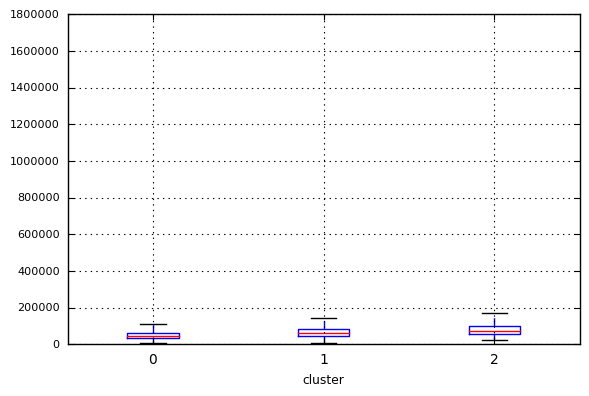

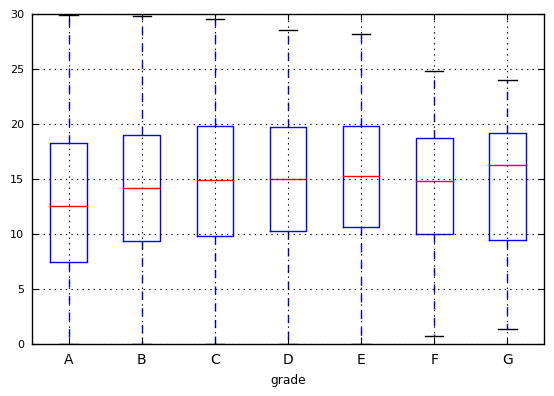

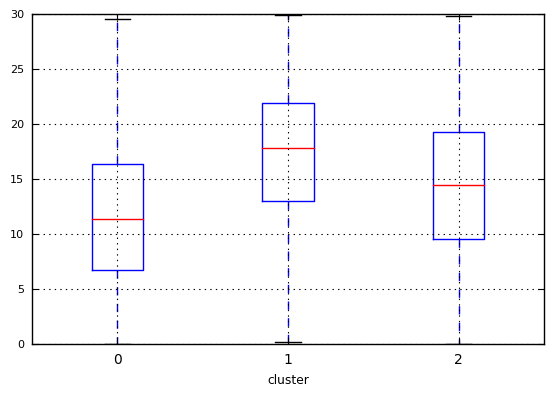

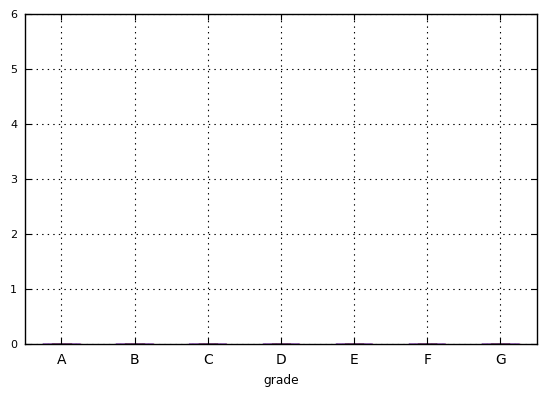

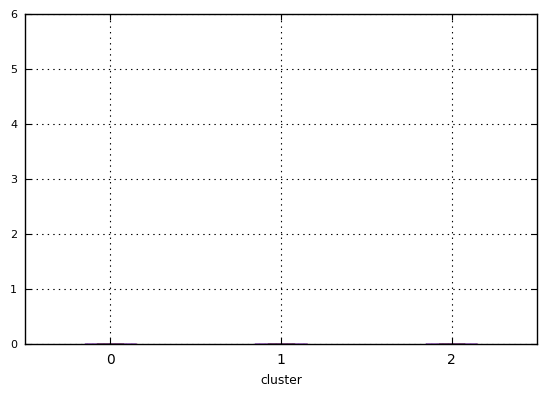

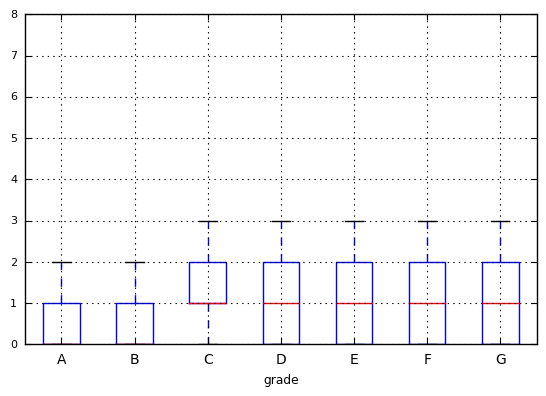

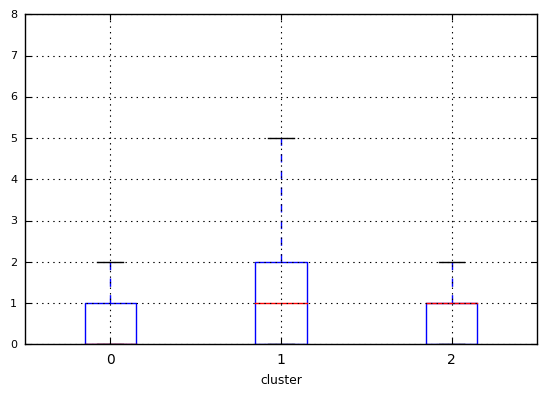

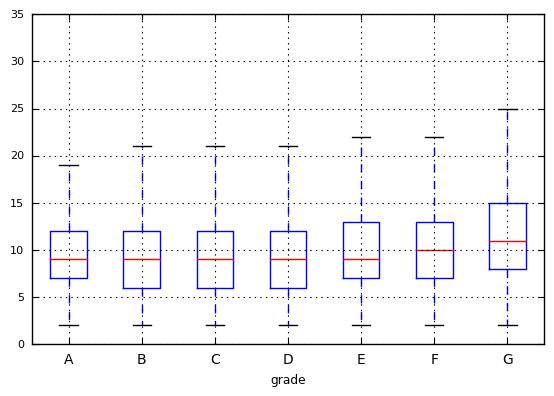

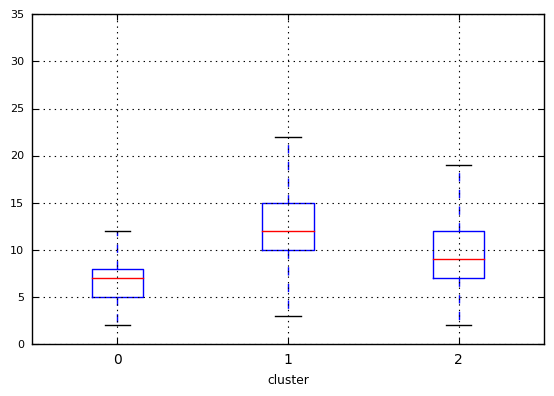

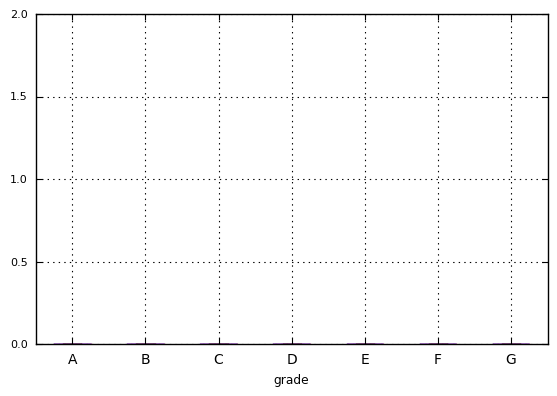

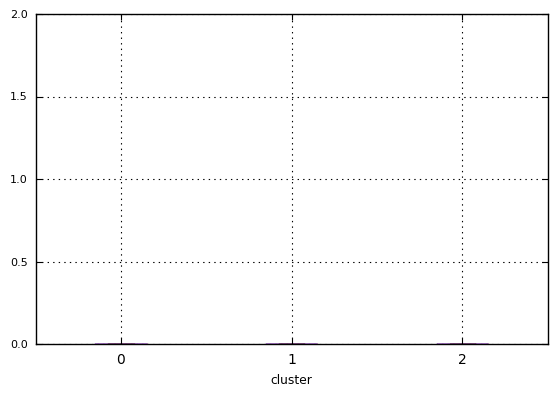

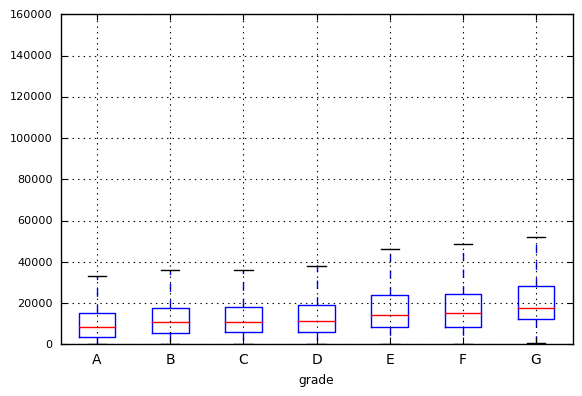

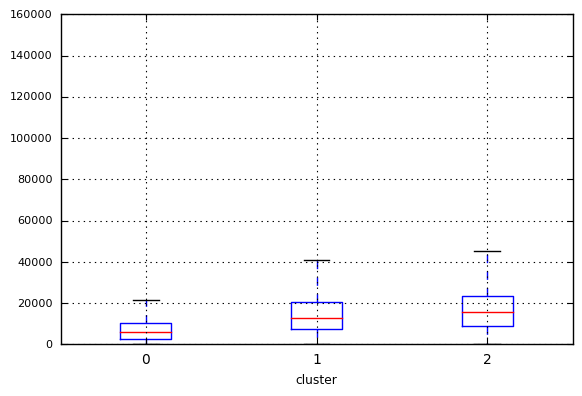

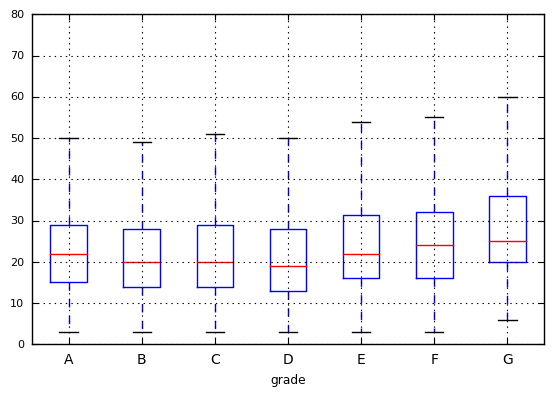

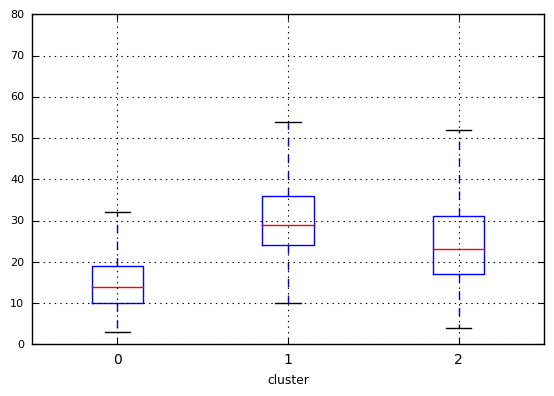

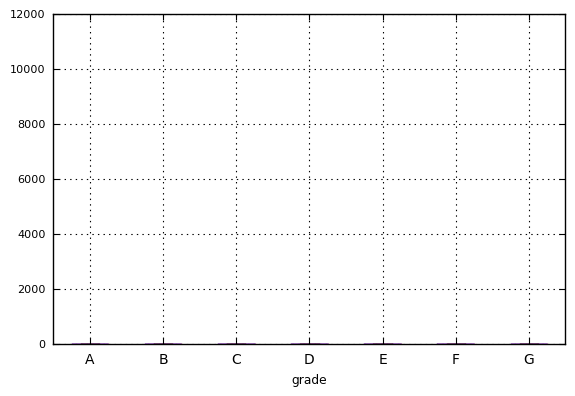

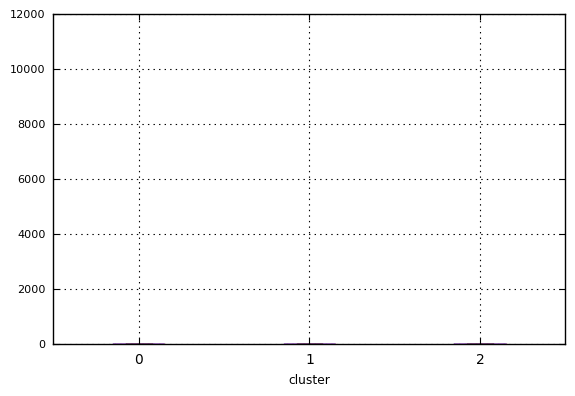

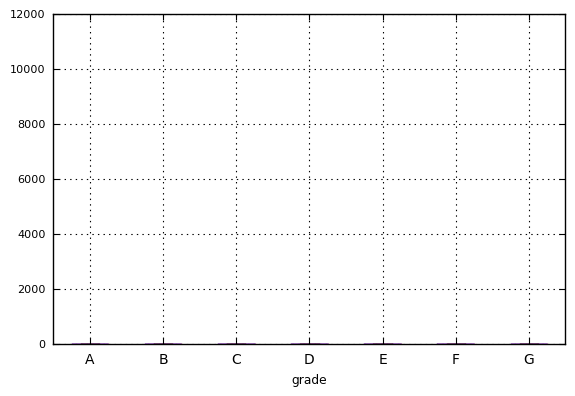

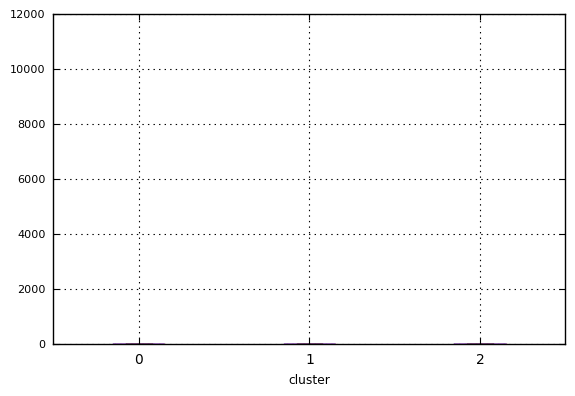

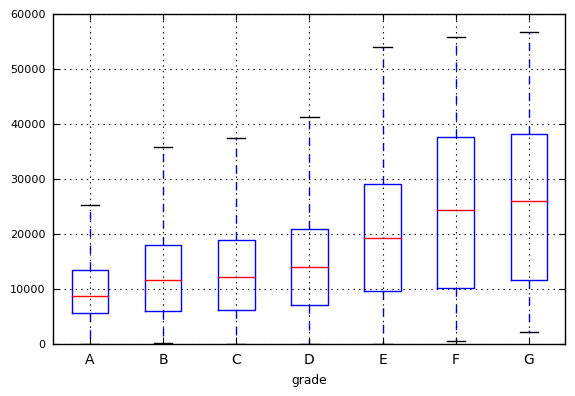

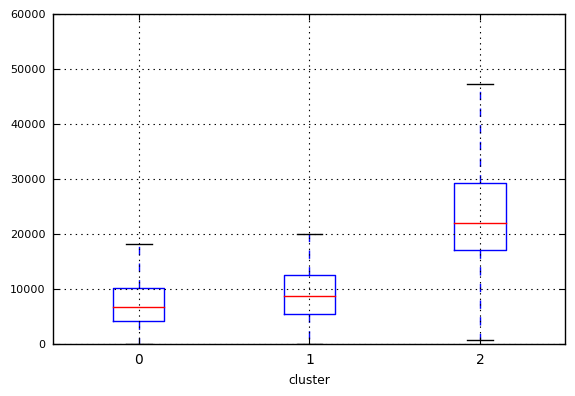

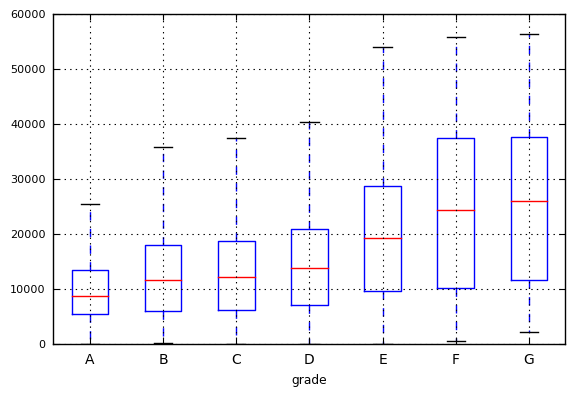

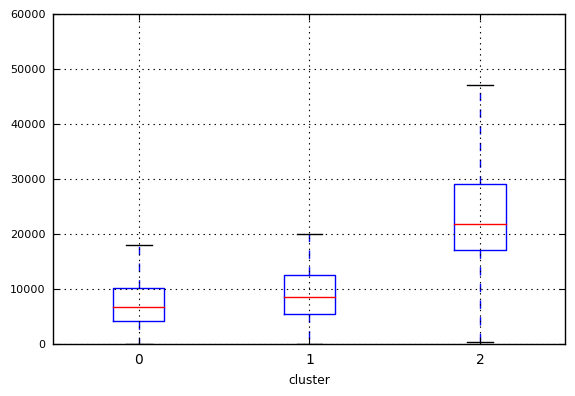

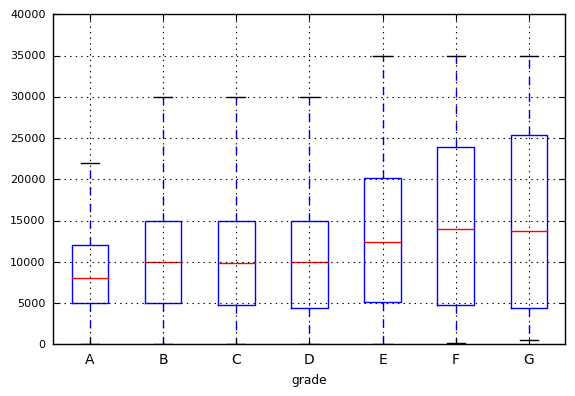

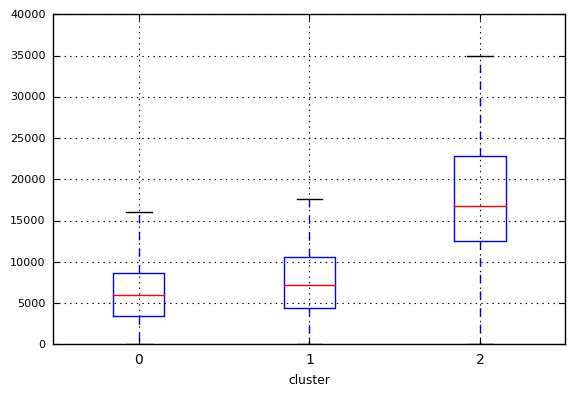

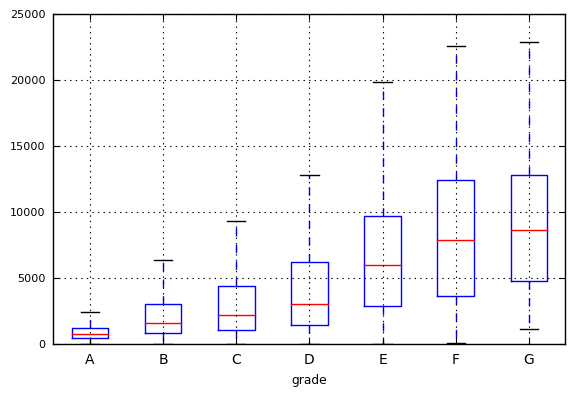

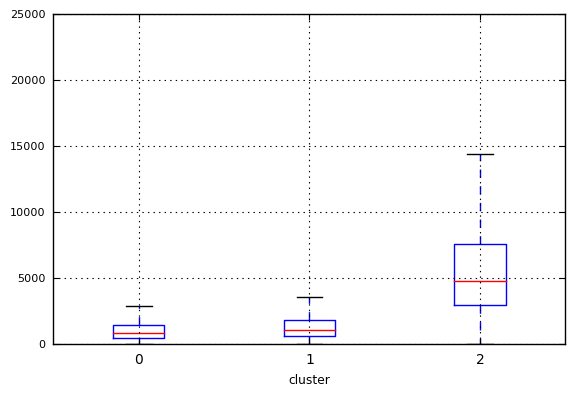

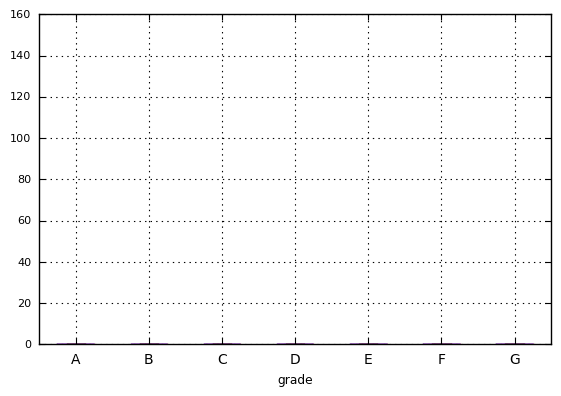

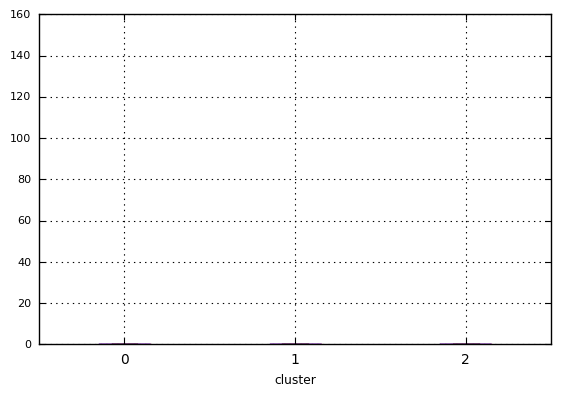

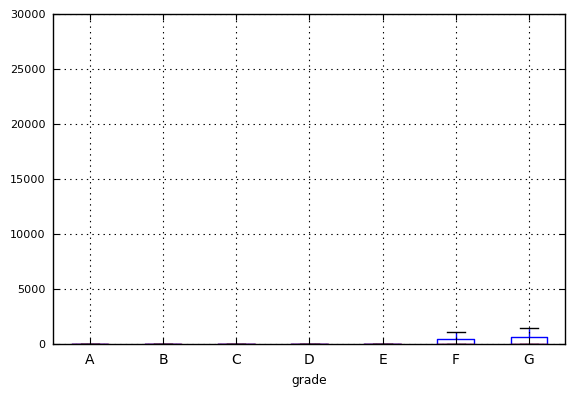

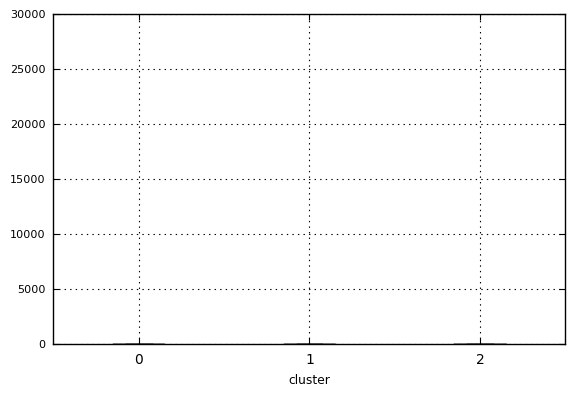

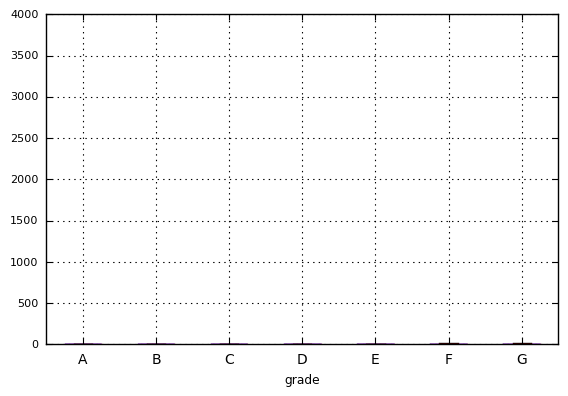

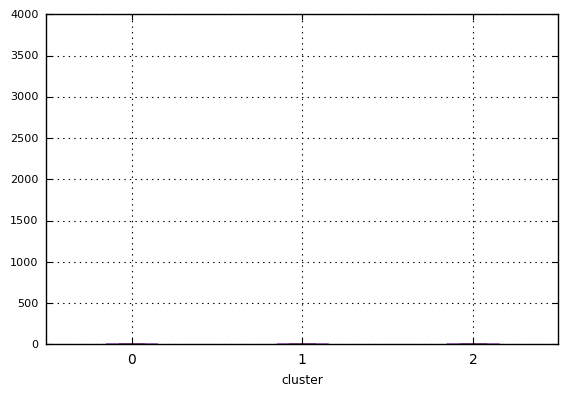

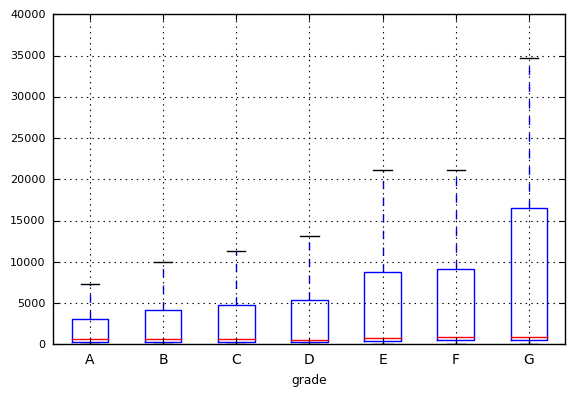

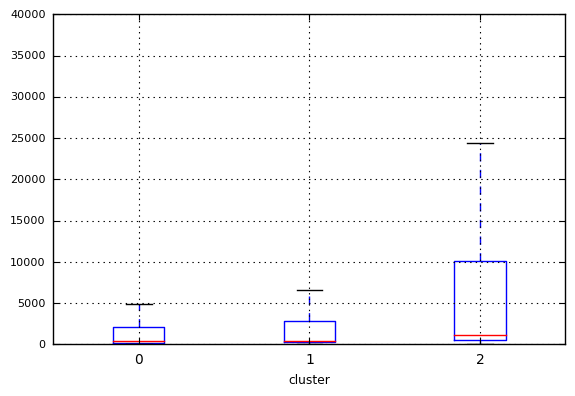

In [5]:
import itertools
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import pydotplus
import sqlite3
from sklearn import svm, datasets, metrics, preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

%matplotlib inline

#Gera uma amostra de 8000 registros
#Este script tem o proposito de gerar imagens ilustrativas para compor o trabalho de conclusao
#Essas imagens vao auxiliar na explicacao dos conceitos

matplotlib.style.use('seaborn-paper')

con = sqlite3.connect("database.sqlite")
df = pd.read_sql_query("""SELECT 
funded_amnt ,
funded_amnt_inv,
loan_amnt ,
cast (replace( term, ' months', '' ) as FLOAT) as term_float,
cast (replace( int_rate, '%', '' ) as FLOAT) as int_rate_float,
installment ,
annual_inc ,
dti ,
delinq_2yrs ,
inq_last_6mths ,
open_acc ,
pub_rec ,
revol_bal ,
total_acc ,
out_prncp ,
out_prncp_inv,
total_pymnt ,
total_pymnt_inv,
total_rec_prncp ,
total_rec_int ,
total_rec_late_fee ,
recoveries ,
collection_recovery_fee ,
last_pymnt_amnt from loan WHERE
funded_amnt IS NOT NULL AND
loan_amnt IS NOT NULL AND
term_float IS NOT NULL AND
int_rate_float IS NOT NULL AND
installment IS NOT NULL AND
emp_length IS NOT NULL AND
annual_inc IS NOT NULL AND
dti IS NOT NULL AND
delinq_2yrs IS NOT NULL AND
inq_last_6mths IS NOT NULL AND
open_acc IS NOT NULL AND
pub_rec IS NOT NULL AND
revol_bal IS NOT NULL AND
total_acc IS NOT NULL AND
out_prncp IS NOT NULL AND
total_pymnt IS NOT NULL AND
total_rec_prncp IS NOT NULL AND
total_rec_int IS NOT NULL AND
total_rec_late_fee IS NOT NULL AND
recoveries IS NOT NULL AND
collection_recovery_fee IS NOT NULL AND
last_pymnt_amnt IS NOT NULL limit 8000
""", con)

#Write correlation in a table
pd.options.display.max_rows = 30
pd.options.display.max_columns = 30
df.corr().to_csv(path_or_buf="correlation.csv", float_format="%.3f")

np.random.seed(42)

data = scale(df)

reduced_data = preprocessing.normalize(data)

kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10)
kmeans.fit(reduced_data)

df = pd.read_sql_query("""SELECT
id,
grade,
funded_amnt ,
funded_amnt_inv,
loan_amnt ,
cast (replace( term, ' months', '' ) as FLOAT) as term_float,
cast (replace( int_rate, '%', '' ) as FLOAT) as int_rate_float,
installment ,
annual_inc ,
dti ,
delinq_2yrs ,
inq_last_6mths ,
open_acc ,
pub_rec ,
revol_bal ,
total_acc ,
out_prncp ,
out_prncp_inv,
total_pymnt ,
total_pymnt_inv,
total_rec_prncp ,
total_rec_int ,
total_rec_late_fee ,
recoveries ,
collection_recovery_fee ,
last_pymnt_amnt from loan WHERE
funded_amnt IS NOT NULL AND
loan_amnt IS NOT NULL AND
term_float IS NOT NULL AND
int_rate_float IS NOT NULL AND
installment IS NOT NULL AND
emp_length IS NOT NULL AND
annual_inc IS NOT NULL AND
dti IS NOT NULL AND
delinq_2yrs IS NOT NULL AND
inq_last_6mths IS NOT NULL AND
open_acc IS NOT NULL AND
pub_rec IS NOT NULL AND
revol_bal IS NOT NULL AND
total_acc IS NOT NULL AND
out_prncp IS NOT NULL AND
total_pymnt IS NOT NULL AND
total_rec_prncp IS NOT NULL AND
total_rec_int IS NOT NULL AND
total_rec_late_fee IS NOT NULL AND
recoveries IS NOT NULL AND
collection_recovery_fee IS NOT NULL AND
last_pymnt_amnt IS NOT NULL limit 8000
""", con)

#Start a image
plt.figure()

#Add labels from kmeans (replace it with spark clustering or with minibatch kmeans)
df["cluster"] = kmeans.labels_
for field in df.columns:
    if field not in ['id', 'cluster', 'grade']:
        df.boxplot(column=field, by='grade')
        plt.title("")
        plt.suptitle("")
        plt.savefig(field+'_by_grade.png', bbox_inches='tight')
        df.boxplot(column=field, by='cluster')
        plt.title("")
        plt.suptitle("")
        plt.savefig(field+'_by_cluster.png', bbox_inches='tight')